# Esercizio 1

**Rispondere alle domande**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carichiamo il Dataset

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [4]:
# Mostrare le vendite maggiori di 10
sales[sales["sales"] > 10]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [5]:
# Mostrare i dati del 2018
sales[sales["year"] == 2018]

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [6]:
# Mostrare le vendite maggiori di 13 e dell'anno 2018
sales[(sales.sales > 13) & (sales.year == 2018)]

,employee,sales,year
0,Katrina,14,2018


In [7]:
# Mostrare tutto tranne il caso precedente
sales[(sales.sales < 13) & (sales.year != 2018)]

,employee,sales,year
2,Jan,6,2020
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
8,Egweyn,5,2020


In [8]:
#Mostrare i dati dove le vendite divise per 3 sono maggiori di 3
sales[(sales.sales / 3) > 3]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [9]:
# Mostrare i dipendenti i cui nomi sono alfabeticamente dopo la J
sales[sales["employee"] > 'J']

,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# Esercizio 2

**Analisi di un dataset di video giochi**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Carichiamo il dataset

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [12]:
# Contare il numero di videogiochi pubblicati
print(f"Sono stati pubblicati {len(df["Name"].unique())} videogiochi.")

Sono stati pubblicati 11493 videogiochi.


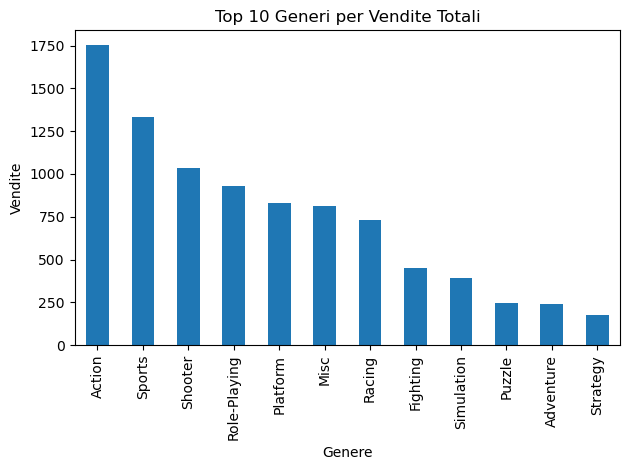

In [16]:
top_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

top_sales.plot(kind="bar")
plt.title("Top 10 Generi per Vendite Totali")
plt.ylabel("Vendite")
plt.xlabel("Genere")
plt.tight_layout()
plt.show()

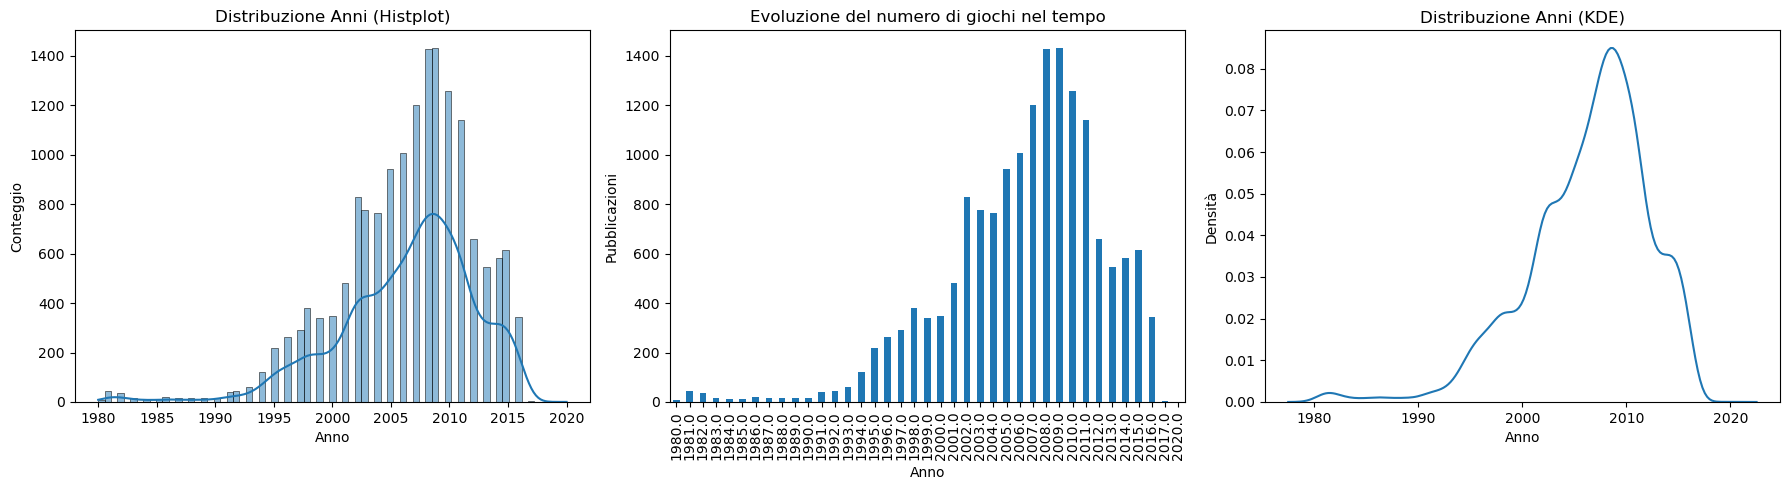

In [ ]:
video_per_year = df.groupby("Year")["Name"].count()

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=df, x="Year", kde=True, ax=axs[0])
axs[0].set_title("Distribuzione Anni (Histplot)")
axs[0].set_ylabel("Conteggio")
axs[0].set_xlabel("Anno")

# Secondo grafico: Bar plot su video_per_year
video_per_year.plot(kind="bar", ax=axs[1])
axs[1].set_title("Evoluzione del numero di giochi nel tempo")
axs[1].set_ylabel("Pubblicazioni")
axs[1].set_xlabel("Anno")

# Terzo grafico: KDE plot
sns.kdeplot(data=df, x="Year", ax=axs[2])
axs[2].set_title("Distribuzione Anni (KDE)")
axs[2].set_ylabel("Densità")
axs[2].set_xlabel("Anno")

plt.tight_layout()
plt.show()

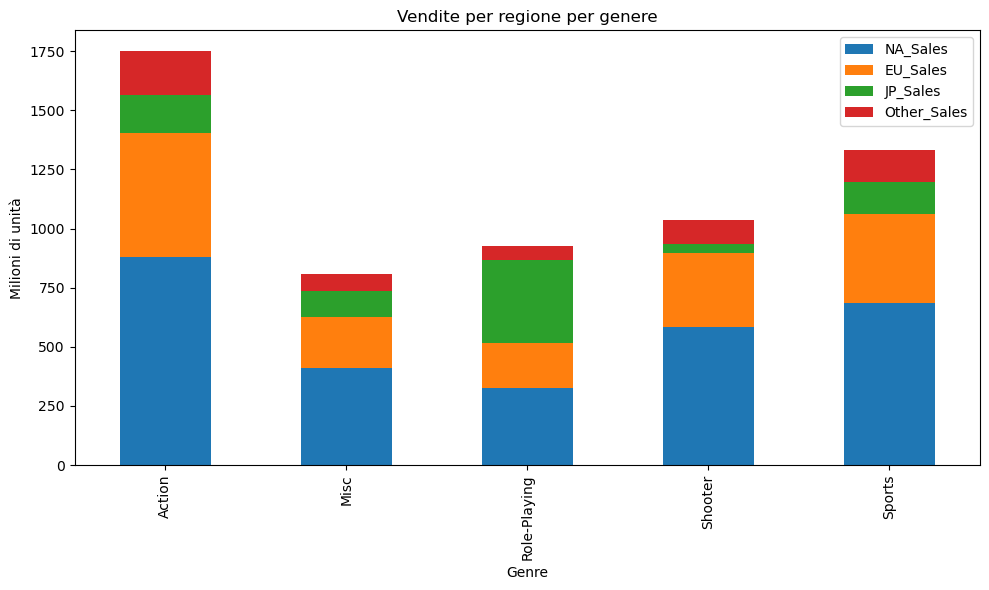

In [ ]:
sales_by_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sort_values(by='NA_Sales', ascending=False)
genres_to_show = ['Action', 'Misc', 'Role-Playing', 'Shooter', 'Sports']

sales_plot = sales_by_genre.reindex(genres_to_show)

# grafico impilato
sales_plot.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title("Vendite per regione per genere")
plt.ylabel("Milioni di unità")
plt.xlabel("Genre")
plt.legend()
plt.tight_layout()
plt.show()